In [47]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [48]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras as kr

import numpy as np
import matplotlib.pyplot as plt
import os
# import pandas as pd
import random

print(tf.__version__)

2.1.0


In [49]:
class_names = os.listdir("../feature/feature_fbank/")
class_names.sort()

print(class_names)
len(class_names)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019740016_kangyeseo', '2017019740017_kwakmihyang', '2017019740018_eundano', '2017019740019_limjinju', '2017019740020_kimseongje', '2017019740021_kwakbokyeong', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parksomi', '2017019770009_yuminji', '2017019770010_parksojin', '2017019770011_kwonyeonwoo', '2017019770012_ladakyeong', '2017019770013_janghyomin', '2017019770014_parkeunbi', '2017019770015_parkdayeung'

64

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, Activation, Dropout, Reshape, concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
import sklearn
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from tensorflow.keras.layers import Conv1D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling3D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adadelta
import numpy


In [51]:
x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    #print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        #print(files[j], j)
        x = np.load("../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x=x.T
        x_list.append(x)
        y_list.append(i)
        
cv_scores, model_history = list(), list()
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = np.array(x_list)
y_train = np.array(y_list)


In [52]:
print("y_train: ", y_train.shape)

y_train:  (320,)


In [53]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state = 42, shuffle=True)
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (256, 469, 40)
y_train:  (256,)
x_val:  (64, 469, 40)
y_val:  (64,)


In [54]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
    
    
x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_val   = x_val.reshape(-1, x_val.shape[1], x_val.shape[2], 1)


x_train = x_train - np.min(x_train)

x_train = x_train / np.max(x_train)

x_val = x_val - np.min(x_val)
x_val = x_val / np.max(x_val)
print("x_train: ", x_train.shape)
print("x_val: ", x_val.shape)
print("y_train_encoded:", y_train_encoded.shape)
print("y_val_encoded:", y_val_encoded.shape)
print("-----------------------")

x_train:  (256, 469, 40, 1)
x_val:  (64, 469, 40, 1)
y_train_encoded: (256, 64)
y_val_encoded: (64, 64)
-----------------------


*** 수정필요 ***

num_rows = 40
num_columns = 174

x_train = x_train.reshape(x_train.shape[0], x, num_columns, 1)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, 1)

num_labels = yy.shape[1]
filter_size = 2

*** 여기까지 ***

대부분 Conv2D는 영상처리에서 많이 사용한다.

Input: Batch Size (N) x Height (H) x Width (W) x Channels (C)

Filter: Height x Width x Input Channels(channel) x Output Channel(# of filters)   // 커널이라고 부르기도 함

Pooling은 feature map의 차원 수를 감소시켜서 특징을 추출하고, 수행 시간을 감소시키는 역할을 한다

In [55]:
# Construct model 
def create_model(X_train, X_val, y_train, y_val): 
    model = Sequential()
    print(X_train.shape)
    model.add(Conv2D(filters=128, kernel_size=1, input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
#     model.add(Dropout(0.2))
    model.add(Conv2D(filters=64, kernel_size=1, activation='relu'))
#     model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=32, kernel_size=1, activation='relu'))
#     model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=16, kernel_size=1, activation='relu'))
#     model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
#     model.add(GlobalAveragePooling2D())
    model.add(Flatten())

    model.add(Dense(y_val.shape[1], activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    val_acc = model.evaluate(X_val, y_val, batch_size=16, verbose = 1)
    history = model.fit(X_val, y_val, batch_size=4, epochs=50, verbose=1, validation_data=(x_val, y_val_encoded))
    return model, val_acc, history

In [56]:
model, val_acc, history = create_model(x_train, x_val, y_train_encoded, y_val_encoded)
print("val_acc : ", val_acc)

cv_scores.append(val_acc)
model_history.append(model)
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

(256, 469, 40, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 469, 40, 128)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 234, 20, 128)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 234, 20, 64)       8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 234, 20, 64)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 234, 20, 32)       2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 234, 20, 32)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 

64/64 [==============================] - 0s 3ms/sample - loss: 6.3582e-05 - accuracy: 1.0000 - val_loss: 5.1910e-05 - val_accuracy: 1.0000
Epoch 45/50
64/64 [==============================] - 0s 3ms/sample - loss: 5.6672e-05 - accuracy: 1.0000 - val_loss: 5.0165e-05 - val_accuracy: 1.0000
Epoch 46/50
64/64 [==============================] - 0s 2ms/sample - loss: 6.8997e-05 - accuracy: 1.0000 - val_loss: 4.8622e-05 - val_accuracy: 1.0000
Epoch 47/50
64/64 [==============================] - 0s 3ms/sample - loss: 5.6667e-05 - accuracy: 1.0000 - val_loss: 4.7184e-05 - val_accuracy: 1.0000
Epoch 48/50
64/64 [==============================] - 0s 3ms/sample - loss: 6.6052e-05 - accuracy: 1.0000 - val_loss: 4.5791e-05 - val_accuracy: 1.0000
Epoch 49/50
64/64 [==============================] - 0s 3ms/sample - loss: 8.9379e-05 - accuracy: 1.0000 - val_loss: 4.4105e-05 - val_accuracy: 1.0000
Epoch 50/50
64/64 [==============================] - 0s 3ms/sample - loss: 5.5992e-05 - accuracy: 1.0000 -

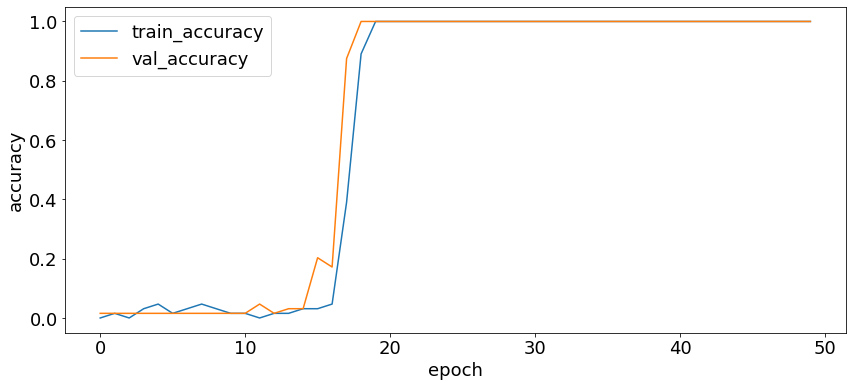

In [57]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [58]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train_encoded, verbose=0)
print("Training Accuracy: ", score)

score = model.evaluate(x_val, y_val_encoded, verbose=0)
print("Testing Accuracy: ", score)

Training Accuracy:  [3.685940831899643, 0.27734375]
Testing Accuracy:  [4.2965317334164865e-05, 1.0]


In [59]:
class_names_1 = os.listdir("../feature/feature_fbank_validation/")
class_names_1.sort()

print(class_names_1)
len(class_names_1)

['2017019740001_kwakjuheon', '2017019770001_kwonyuna', '2017019880001_kimsubin']


3

In [60]:
from sklearn.metrics import accuracy_score

x_validation_list=[]
y_validation_list=[]

val_file_path = "../feature/feature_fbank_validation/"
val_class_names = os.listdir(val_file_path)
val_class_names.sort()
val_fname=[]
X_TF_pred = []
y_TF_pred = []

for i in range(0,len(val_class_names)):
    val_files=os.listdir(val_file_path+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append(val_file_path+val_class_names[i]+"/"+val_files[j])
        

for i,fname in zip(range(0,len(val_fname)), val_fname):
    tempX = np.load(val_fname[i])
    tempX = tempX.T
    x_validation_list.append(tempX)
    y_validation_list.append(val_class_names.index(fname.split('/')[3]))
    
X_TF_pred = np.array(x_validation_list)
y_TF_real_pred = np.array(y_validation_list)

X_TF_pred = X_TF_pred.reshape(-1, X_TF_pred.shape[1], X_TF_pred.shape[2], 1)

X_TF_pred = X_TF_pred - np.min(X_TF_pred)
X_TF_pred = X_TF_pred / np.max(X_TF_pred)

pred_out = model.predict(X_TF_pred)

real =[]
pred_out_idex=[]


for i,pred in zip(range(0, len(pred_out)), pred_out) :
   
    print("Predict :",class_names[np.argmax(pred)], ", Real :", val_class_names[y_TF_real_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_real_pred[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))


Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740009_shindonghwan , Real : 2017019740001_kwakjuheon
Predict : 2017019770007_simseungmin , Real : 2017019740001_kwakjuheon
Predict : 2017019770038_kanghyeyun , Real : 2017019740001_kwakjuheon
Predict : 2017019770021_heoyoonjung , Real : 2017019740001_kwakjuheon
Predict : 2017019770038_kanghyeyun , Real : 2017019770001_kwonyuna
Predict : 2017019770020_nomyungok , Real : 2017019770001_kwonyuna
Predict : 2017019740009_shindonghwan , Real : 2017019770001_kwonyuna
Predict : 2017019770005_hyeonsanghyeok , Real : 2017019770001_kwonyuna
Predict : 2017019740009_shindonghwan , Real : 2017019770001_kwonyuna
Predict : 2017019770021_heoyoonjung , Real : 2017019880001_kimsubin
Predict : 2017019740009_shindonghwan , Real : 2017019880001_kimsubin
Predict : 2017019740009_shindonghwan , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019740009_shindonghwan ,